In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

TEXTURE_FEATURES_3D = [
    # GLCM features
    "3GLCM_ACOR", "3GLCM_ASM", "3GLCM_CLUPROM", "3GLCM_CLUSHADE", "3GLCM_CLUTEND",
    "3GLCM_CONTRAST", "3GLCM_CORRELATION", "3GLCM_DIFAVE", "3GLCM_DIFENTRO", "3GLCM_DIFVAR",
    "3GLCM_DIS", "3GLCM_ENERGY", "3GLCM_ENTROPY", "3GLCM_HOM1", "3GLCM_HOM2",
    "3GLCM_ID", "3GLCM_IDN", "3GLCM_IDM", "3GLCM_IDMN", "3GLCM_INFOMEAS1", "3GLCM_INFOMEAS2",
    "3GLCM_IV", "3GLCM_JAVE", "3GLCM_JE", "3GLCM_JMAX", "3GLCM_JVAR",
    "3GLCM_SUMAVERAGE", "3GLCM_SUMENTROPY", "3GLCM_SUMVARIANCE", "3GLCM_VARIANCE",
    "3GLCM_ASM_AVE", "3GLCM_ACOR_AVE", "3GLCM_CLUPROM_AVE", "3GLCM_CLUSHADE_AVE",
    "3GLCM_CLUTEND_AVE", "3GLCM_CONTRAST_AVE", "3GLCM_CORRELATION_AVE",
    "3GLCM_DIFAVE_AVE", "3GLCM_DIFENTRO_AVE", "3GLCM_DIFVAR_AVE", "3GLCM_DIS_AVE",
    "3GLCM_ENERGY_AVE", "3GLCM_ENTROPY_AVE", "3GLCM_HOM1_AVE", "3GLCM_ID_AVE",
    "3GLCM_IDN_AVE", "3GLCM_IDM_AVE", "3GLCM_IDMN_AVE", "3GLCM_IV_AVE",
    "3GLCM_JAVE_AVE", "3GLCM_JE_AVE", "3GLCM_INFOMEAS1_AVE", "3GLCM_INFOMEAS2_AVE",
    "3GLCM_VARIANCE_AVE", "3GLCM_JMAX_AVE", "3GLCM_JVAR_AVE",
    "3GLCM_SUMAVERAGE_AVE", "3GLCM_SUMENTROPY_AVE", "3GLCM_SUMVARIANCE_AVE",

    # GLRLM features
    "3GLRLM_SRE", "3GLRLM_LRE", "3GLRLM_GLN", "3GLRLM_GLNN", "3GLRLM_RLN", "3GLRLM_RLNN",
    "3GLRLM_RP", "3GLRLM_GLV", "3GLRLM_RV", "3GLRLM_RE", "3GLRLM_LGLRE", "3GLRLM_HGLRE",
    "3GLRLM_SRLGLE", "3GLRLM_SRHGLE", "3GLRLM_LRLGLE", "3GLRLM_LRHGLE",
    "3GLRLM_SRE_AVE", "3GLRLM_LRE_AVE", "3GLRLM_GLN_AVE", "3GLRLM_GLNN_AVE",
    "3GLRLM_RLN_AVE", "3GLRLM_RLNN_AVE", "3GLRLM_RP_AVE", "3GLRLM_GLV_AVE",
    "3GLRLM_RV_AVE", "3GLRLM_RE_AVE", "3GLRLM_LGLRE_AVE", "3GLRLM_HGLRE_AVE",
    "3GLRLM_SRLGLE_AVE", "3GLRLM_SRHGLE_AVE", "3GLRLM_LRLGLE_AVE", "3GLRLM_LRHGLE_AVE",

    # GLSZM features
    "GLSZM_SAE", "GLSZM_LAE", "GLSZM_GLN", "GLSZM_GLNN", "GLSZM_SZN", "GLSZM_SZNN",
    "GLSZM_ZP", "GLSZM_GLV", "GLSZM_ZV", "GLSZM_ZE", "GLSZM_LGLZE", "GLSZM_HGLZE",
    "GLSZM_SALGLE", "GLSZM_SAHGLE", "GLSZM_LALGLE", "GLSZM_LAHGLE",

    # GLDM features
    "3GLDM_SDE", "3GLDM_LDE", "3GLDM_GLN", "3GLDM_DN", "3GLDM_DNN", "3GLDM_GLV",
    "3GLDM_DV", "3GLDM_DE", "3GLDM_LGLE", "3GLDM_HGLE", "3GLDM_SDLGLE", "3GLDM_SDHGLE",
    "3GLDM_LDLGLE", "3GLDM_LDHGLE",

    # GLDZM features
    "3GLDZM_SDE", "3GLDZM_LDE", "3GLDZM_LGLZE", "3GLDZM_HGLZE", "3GLDZM_SDLGLE",
    "3GLDZM_SDHGLE", "3GLDZM_LDLGLE", "3GLDZM_LDHGLE", "3GLDZM_GLNU", "3GLDZM_GLNUN",
    "3GLDZM_ZDNU", "3GLDZM_ZDNUN", "3GLDZM_ZP", "3GLDZM_GLM", "3GLDZM_GLV",
    "3GLDZM_ZDM", "3GLDZM_ZDV", "3GLDZM_ZDE",

    # NGLDM features
    "3NGLDM_LDE", "3NGLDM_HDE", "3NGLDM_LGLCE", "3NGLDM_HGLCE", "3NGLDM_LDLGLE",
    "3NGLDM_LDHGLE", "3NGLDM_HDLGLE", "3NGLDM_HDHGLE", "3NGLDM_GLNU", "3NGLDM_GLNUN",
    "3NGLDM_DCNU", "3NGLDM_DCNUN", "3NGLDM_DCP", "3NGLDM_GLM", "3NGLDM_GLV",
    "3NGLDM_DCM", "3NGLDM_DCV", "3NGLDM_DCENT", "3NGLDM_DCENE",

    # NGTDM features
    "3NGTDM_COARSENESS", "3NGTDM_CONTRAST", "3NGTDM_BUSYNESS", "3NGTDM_COMPLEXITY",
    "3NGTDM_STRENGTH",
]

In [3]:



def read_features(features_dir: str) -> pd.DataFrame:
    """Read features from a directory.
    
    Args:
        features_dir: Directory containing features
        
    Returns:
        DataFrame containing all features
    """
    features = []
    for file in os.listdir(features_dir):
        df = pd.read_csv(os.path.join(features_dir, file))
        features.append(df)
    return pd.concat(features, ignore_index=True)

In [8]:
original_features_dir = "../../datasets/Craig_scans/features" 
normalized_features_dir = "../../datasets/Craig_scans/normalized_features"

original_features = read_features(original_features_dir)
normalized_features = read_features(normalized_features_dir)

print(original_features.head())
print(normalized_features.head())



               intensity_image                   mask_image  ROI_label  \
0  human_brain_20130613.nii.gz  human_brain_20130613.nii.gz       50.0   
1  human_brain_20100513.nii.gz  human_brain_20100513.nii.gz       50.0   
2  human_brain_20100304.nii.gz  human_brain_20100304.nii.gz       50.0   
3  human_brain_20130403.nii.gz  human_brain_20130403.nii.gz       50.0   
4  human_brain_20121108.nii.gz  human_brain_20121108.nii.gz       50.0   

       3COV  3COVERED_IMAGE_INTENSITY_RANGE       3ENERGY  3ENTROPY  \
0  0.589830                             1.0  1.990064e+12  2.956464   
1  0.584896                             1.0  1.957909e+12  2.692284   
2  0.571353                             1.0  1.997573e+12  2.882276   
3  0.586386                             1.0  1.927582e+12  2.893618   
4  0.586373                             1.0  1.969741e+12  3.016116   

   3EXCESS_KURTOSIS  3HYPERFLATNESS  3HYPERSKEWNESS  ...  3GLRLM_RP_AVE  \
0         -1.024066        8.634829        1.569215  

In [5]:
def select_features(features: pd.DataFrame, feature_list: list) -> pd.DataFrame:
    """Select features from a DataFrame.
    
    Args:
        features: DataFrame containing features
        feature_list: List of feature names to select
        
    Returns:
        DataFrame containing selected features
    """ 
    return features[feature_list]


original_features = select_features(original_features, TEXTURE_FEATURES_3D)
normalized_features = select_features(normalized_features, TEXTURE_FEATURES_3D)

print(original_features.head())
print(normalized_features.head())

   3GLCM_ACOR  3GLCM_ASM  3GLCM_CLUPROM  3GLCM_CLUSHADE  3GLCM_CLUTEND  \
0   53.089421   0.263062   36646.125332     1319.314532     114.389434   
1   68.805723   0.271242   63612.891527     1995.486121     152.161456   
2   69.745224   0.269629   69647.394040     2158.023118     155.951201   
3  110.268676   0.273878  188776.017159     4592.534364     256.468628   
4   71.596314   0.256784   69424.480902     2125.237368     157.789204   

   3GLCM_CONTRAST  3GLCM_CORRELATION  3GLCM_DIFAVE  3GLCM_DIFENTRO  \
0        1.460939           0.974779      0.569792        1.468993   
1        1.795864           0.976671      0.628210        1.543095   
2        1.947852           0.975328      0.652970        1.572403   
3        3.100376           0.976111      0.827107        1.757040   
4        2.006625           0.974885      0.672991        1.602422   

   3GLCM_DIFVAR  ...  3NGLDM_GLV  3NGLDM_DCM  3NGLDM_DCV  3NGLDM_DCENT  \
0      1.136275  ...   29.881788   15.653827   84.994355    

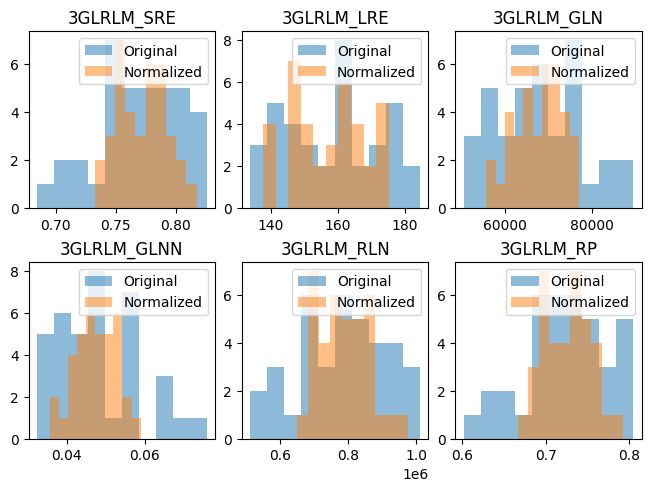

In [21]:
import matplotlib.pyplot as plt
num_bins = 10

filter_threshold = 100
fig, axs = plt.subplots(2, 3, constrained_layout=True)
cnt = 0 
features = ["3GLRLM_SRE", "3GLRLM_LRE", "3GLRLM_GLN", "3GLRLM_GLNN", "3GLRLM_RLN", "3GLRLM_RP"]
for feature in features:
    # print(f"Shape: {data.shape}, Values > {filter_threshold}: {len(filtered_data)}")

    axs[cnt//3, cnt%3].hist(original_features[feature],  bins=num_bins, alpha=0.5, label='Original')
    axs[cnt//3, cnt%3].hist(normalized_features[feature], bins=num_bins, alpha=0.5, label='Normalized')
    axs[cnt//3, cnt%3].set_title(feature)
    # axs[cnt//3, cnt%3].set_xlabel('Signal Intensity')
    # axs[cnt//3, cnt%3].set_ylabel('Frequency')
    axs[cnt//3, cnt%3].legend()
    cnt += 1

# plt.legend()
plt.show()